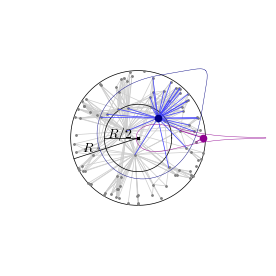

In [42]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

avgDeg = 10
nodes = 150
alpha = 1.0
#C=
#C=-2
R = 2*np.log(nodes) + 2.0 * np.log(2.0 * alpha**2 / (avgDeg*np.pi*(alpha - 0.5)**2)) 
#print(C,R)

def deltaTheta(a,b,R):
    tmp = (np.cosh(a)*np.cosh(b)-np.cosh(R)) / np.sinh(a) / np.sinh(b)
    if np.isscalar(tmp):
        tmp = min(1.0, max(-1.0, tmp))
    else:
        tmp[tmp > 1.0] = 1.0
        tmp[tmp < -1.0] = -1.0
    return np.arccos(tmp)

def drawHypCircle(theta, r, R, Rmin=0, Rmax=1e100, N=500):
    d = np.linspace(0, 2*np.pi, N)
    rs = np.log( 
        (2*np.cosh(R) + (-4*np.cosh(r)**2 +4*np.cosh(R)**2 + 4*np.cos(d)**2 * np.sinh(r)**2)**0.5) /
        (2*(np.cosh(r) - np.cos(d) * np.sinh(r)))
    )
    rs[rs > Rmax] = Rmax
    rs[rs < Rmin] = Rmin
    return d+theta, rs

def getRandomPts(R, a, n):
    theta = np.random.rand(n) * 2 * np.pi
    rads = np.arccosh((np.cosh(a * R) - 1) * np.random.rand(n) + 1.0) / a
    rads.sort()
    return theta, rads

def getNeighbors(pt_theta, pt_rads, i, restrict="id"):
    mask = np.cosh(pt_rads) * np.cosh(pt_rads[i]) - (np.cos(pt_theta - pt_theta[i]) * np.sinh(pt_rads) * np.sinh(pt_rads[i])) <= np.cosh(R)
    if ("id" == restrict):
        return [i+1+j for j in np.nonzero(mask[i+1:])[0]]
    return np.nonzero(mask)[0]

def latexFriendlyPlot(fig_width_pt = 246.0, ratio=(5**0.5-1.0)/2.0): 
    # Get this from LaTeX using \showthe\columnwidth
    # borrowed from http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
    inches_per_pt = 1.0/72.27               # Convert pt to inch
    fig_width = fig_width_pt*inches_per_pt  # width in inches
    fig_height = fig_width*ratio      # height in inches
    fig_size =  [fig_width,fig_height]
    params = {'backend': 'ps',
              'axes.labelsize': 10,
              'font.size': 10,
              'legend.fontsize': 10,
              'xtick.labelsize': 8,
              'ytick.labelsize': 8,
              'text.usetex': True,
              'figure.figsize': fig_size,
    "font.family": "serif",
    "font.serif": []             
             }
    plt.rcParams.update(params)
    
latexFriendlyPlot(398*2, 0.3)
plt.cla()
plt.clf()
plt.rc('lines', linewidth=0.3)
    
ax = plt.subplot(111, projection='polar')    
pt_theta, pt_rads = getRandomPts(R, alpha, 100)
pt_rads[:3] = [R/5, R/4, R/2.4]
pt_theta[2] = np.pi * 0.25
pt_theta[80] = 0.0

activePts = {2: ("#000080", "#4040ff"), 80: ("#900090", "#a000a0")}

for i in range(len(pt_theta)-1):
    active = i in activePts
    color = activePts[i][1] if active else "#cccccc"
    for j in getNeighbors(pt_theta, pt_rads, i, "all" if active else "id"):
        ax.add_line(plt.Line2D(pt_theta[[i,j]], pt_rads[[i,j]], linewidth=0.5, color=color, zorder=2 * active))


ax.scatter(pt_theta, pt_rads, marker='o', color="#808080", s=1, zorder=1)

for i in activePts:
    ax.plot(*drawHypCircle(pt_theta[i], pt_rads[i], R), color=activePts[i][0])
    ax.scatter(pt_theta[i], pt_rads[i], marker='o', color=activePts[i][0], zorder=100)
    

#Bounding Circle
ax.plot(*drawHypCircle(0,0,R/2), color="#000000", linewidth=0.5, zorder=0)
ax.plot(*drawHypCircle(0,0,R), color="#000000", linewidth=0.5, zorder=0)
ax.scatter([0], [0], marker='x', color="#000000", s=4)
ax.add_line(plt.Line2D([np.pi] * 2, [0, R/2], linewidth=0.5, color="#000000", zorder=0))
ax.add_line(plt.Line2D([np.pi * 1.1] * 2, [0, R], linewidth=0.5, color="#000000", zorder=0))
ax.text(np.pi * 1.08, R*0.85, "$R$")
ax.text(np.pi - 0.03, R*0.45, r"$R/2$")



ax.set_rmax(R*1.9)
ax.set_rticks(list(np.linspace(R/2, R, int(R/2))))  # less radial ticks
ax.set_rlabel_position(np.pi)  # get radial labels away from plotted line
ax.grid(True)
ax.yaxis.set_ticklabels([])
ax.xaxis.set_ticks([])
ax.yaxis.set_visible(False)
ax.axison=False


plt.savefig("figures/hyperbolic_graph_model.pgf", transparnt=True, bbox_inches="tight")
plt.show()



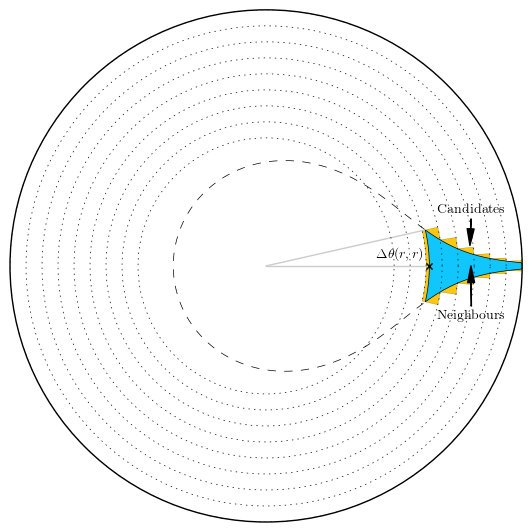

In [43]:
from matplotlib.transforms import Bbox
from matplotlib.path import Path
import matplotlib.patches as patches

latexFriendlyPlot(398*4, 0.3)

plt.cla()
plt.clf()
plt.rc('lines', linewidth=0.3)

ax = plt.subplot(111, projection='polar')    

R=16.0

r = R-5.8
theta = 0
tso, rso = drawHypCircle(theta, r , R, 0, R, 1000)
ts = tso[rso > r]
rs = rso[rso > r]
i = len(ts) // 2
ts = np.hstack([ts[:i], np.linspace(ts[i-1]%(2*np.pi), (ts[i] - 2*np.pi), 100), ts[i:]])
rs = np.hstack([rs[:i], [r]* 100, rs[i:]])
ax.fill(ts, rs, facecolor="#11c6fc", linewidth=0.5, zorder=1)
ax.scatter([theta], [r], marker='x', color="#000000", zorder=2)

ax.plot(tso[rso <= r], rso[rso <= r], linewidth=0.5, color="#000000", ls='--')

i = 0
while R-i > r:
    upper = R-i
    lower = R-i-1
    dt = deltaTheta(r, max(lower, r), R) 
    N = 100
    ts = np.hstack([np.linspace(theta - dt, theta + dt, N), np.linspace(theta + dt, theta - dt, N)])
    rs = np.hstack([lower] * N + [upper] * N)
    ax.fill(ts, rs, zorder=0, facecolor="#fcc611", linewidth=0.1)
    
    i += 1
    
arrow=dict(facecolor='black', shrink=1, headwidth=5, width=0.05)
ax.annotate(r"Neighbours", xy=(0, R*0.8), xytext=(-0.3, R*0.7), arrowprops=arrow)
ax.annotate(r"Candidates", xy=(0.1, R*0.8), xytext=( 0.3, R*0.7), arrowprops=arrow)

# delta Marker
dt = deltaTheta(r,r,R)
ax.add_line(plt.Line2D([0, theta], [0, r], linewidth=1, color=color, zorder=0))
ax.add_line(plt.Line2D([0, theta+dt], [0, r], linewidth=1, color=color, zorder=0))
ax.text(dt/3, r-3.3, r"$\Delta\theta(r,r)$")

ax.set_rmax(R)
ax.set_rticks(list(np.linspace(R/2, R, int(R/2)+1)))  # less radial ticks
ax.set_rlabel_position(np.pi)  # get radial labels away from plotted line
ax.grid(True)
ax.yaxis.set_ticklabels([])
ax.xaxis.set_ticks([])
ax.set_clip_box(Bbox([[0, 1], [0, 1]]))
ax.set_clip_on(True)

plt.savefig("figures/nkbands.pgf", transparent=True, bbox_inches="tight")
def draw_arc(t1, t2, r):
    n = np.max(10, (t2-t1)/2/np.pi * 100)
    ax.plot( np.linspace(t1, t2, n), [r] * n )
    
def draw_request(t, r):
    pass
plt.show()

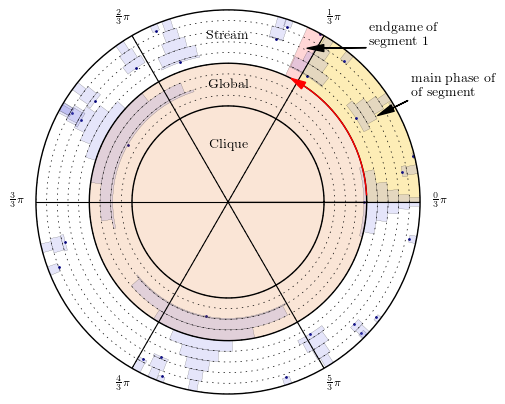

In [44]:
from matplotlib.patches import Arc

latexFriendlyPlot(398*3, 0.3)
plt.cla()
plt.clf()
plt.rc('lines', linewidth=0.3)

ax = plt.subplot(111, projection='polar')    

np.random.seed(1)
avgDeg = 2
nodes = 30
alpha = 1.0
R = 2*np.log(nodes) + 2.0 * np.log(2.0 * alpha**2 / (avgDeg*np.pi*(alpha - 0.5)**2)) 
R = 10

pt_theta, pt_rads = getRandomPts(R, 1, nodes)
#pt_theta[2] = 1
pt_theta[4] = np.pi / 3.1
pt_theta[6] = np.pi / -3.1


def draw_arc(t1, t2, r, *args, **kwargs):
    n = max(10, int ((t2-t1)/2/np.pi * 100) )
    ax.plot( np.linspace(t1, t2, n), [r] * n, *args, **kwargs )
    
def draw_request(t, r, ro, dt=-1, *args, **kwargs):
    if dt < 0:
        dt = deltaTheta(r,r,R)
    N = max(10, int(dt * 30))
    ts = np.hstack([np.linspace(t - dt, t + dt, N), np.linspace(t + dt, t - dt, N)])
    rs = np.hstack([r] * N + [ro] * N)
    ax.fill(ts, rs, *args, **kwargs)    



bands = [0] + list(np.linspace(R/2, R, int(R)))
segs = 6
segwidth = 2*np.pi / segs
fstStrBand = 1
while deltaTheta(bands[fstStrBand], bands[fstStrBand], R) > np.pi / segs / 2:
    fstStrBand += 1

draw_request(np.pi, 0, bands[fstStrBand], np.pi, facecolor=(0.9, 0.5, 0.2, 0.2), linewidth=0.1)


draw_request(segwidth / 2, bands[fstStrBand], R, segwidth / 2, facecolor=(0.98, 0.77, 0.06, 0.3), linewidth=0.1, zorder=-1)
rep_pt = 4
rep_width = deltaTheta(pt_rads[rep_pt], pt_rads[rep_pt], R) + pt_theta[4] - segwidth

draw_request(segwidth  + rep_width/2, bands[fstStrBand], R, rep_width/2, facecolor=(1, 0.2, 0.2, 0.2), linewidth=0.1)

ax.plot(*drawHypCircle(0, 0, R/2), linewidth=1, color="#000000")
ax.plot(*drawHypCircle(0, 0, bands[fstStrBand]), linewidth=1, color="#000000")
  
ax.scatter(pt_theta, pt_rads, marker='o', color="#000080", s=1, zorder=1)

for t in np.linspace(0, 2*np.pi, segs, False):
    plt.plot([t,t], [0, R], color="#000000", linewidth=0.8)


for b in range(len(bands) - 1):
    lb, rb = bands[b], bands[b+1]
    mask = pt_rads < rb
    thetas = pt_theta[mask]
    rads = pt_rads[mask]
    rads[rads < lb] = lb
    fc = (0.5, 0.5, 0.9, 0.2)
    for t, r in zip(thetas, rads):
        draw_request(t, r, rb, facecolor=fc, linewidth=0.1)

fsb = bands[fstStrBand]        
ax.text(-1.5*np.pi, R*0.3, r"Clique", ha="center", va="center")
ax.text(-1.5*np.pi, (fsb-R/2)/2 + R/2, r"Global", ha="center", va="center")
ax.text(-1.5*np.pi, (R-fsb)/2 + fsb, r"Stream", ha="center", va="center")

ax.annotate("main phase of\nof segment", xy=(segwidth * 0.5, R*0.9), xytext=(segwidth * 0.5, 1.1*R), arrowprops=arrow)
ax.annotate("endgame of\nsegment 1", xy=(segwidth + rep_width * 0.5, R*0.9), xytext=(segwidth * 0.8, 1.1*R), arrowprops=arrow)

r = fsb
ac = "#ff0000"
ax.fill( [segwidth*1.05, segwidth*0.95, segwidth*0.95], [r, r-0.2, r+0.2], facecolor=ac, color=ac, zorder=100)
draw_arc(0.05 * segwidth, 0.95 * segwidth, r, ac, linewidth=1,  zorder=100)


ax.set_rmax(R)
ax.set_rticks(bands)  # less radial ticks
ax.set_rlabel_position(np.pi)  # get radial labels away from plotted line
ax.grid(True)
ax.yaxis.set_ticklabels([])

ax.xaxis.set_ticks([np.pi*2/segs*i for i in range(segs)])
ax.xaxis.set_ticklabels([r"$\frac{%d}{%d}\pi$" % (i, segs/2) for i in range(segs)])
ax.set_clip_box(Bbox([[0, 1], [0, 1]]))
ax.set_clip_on(True)

plt.savefig("figures/segments.pgf", transparent=True, bbox_inches="tight")
plt.show()

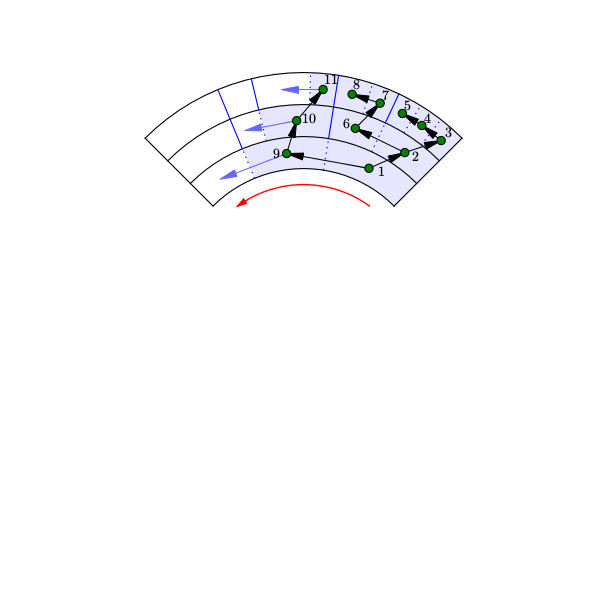

In [99]:
from matplotlib.patches import Arc

latexFriendlyPlot(398*4, 0.3)
plt.cla()
plt.clf()
plt.rc('lines', linewidth=0.6)

ax = plt.subplot(111, projection='polar')  

R = 10

thl = np.pi * 0.25
thr = np.pi * 0.75
segw = thr - thl

bands = [i*R/8 for i in range(4, 8)]

# grid
for b in bands: draw_arc(thl, thr, b, color="black", linewidth=0.8)
ax.plot([thl, thl], [bands[0], bands[-1]],  color="black", linewidth=0.8)
ax.plot([thr, thr], [bands[0], bands[-1]],  color="black", linewidth=0.8)

# marching direction
rarc = bands[0] - (bands[1]-bands[0]) / 2
draw_arc(thl + segw*0.1, thr - segw*0.1, rarc, color="#ff0000", linewidth=1)
ax.fill( [thr-segw*0.1, thr-segw*0.15, thr-segw*0.15], [rarc, rarc-0.1, rarc+0.1], color="#ff0000", facecolor="#ff0000")

def draw_stops(b, t):
    ax.plot([thl+t, thl+t], [bands[b], bands[b+1]],  color="blue", linewidth=0.8, ls=":")
    if b+1<len(bands):
        ax.plot([thl+t, thl+t], [bands[b+1], bands[-1]],  color="blue", linewidth=0.8)


def fill_band(tl, tr, bl, bu,  *args, **kwargs):
    N = 50
    ts = np.hstack([np.linspace(thl+tl, thl+tr, N), np.linspace(thl+tr, thl+tl, N)])
    rs = np.hstack([ bands[bl] ] * N + [ bands[bu] ] * N)
    ax.fill(ts, rs, *args, **kwargs)        

comp_col = (0.9, 0.9, 1)
fill_band(0, 0.4*segw, 0, -1, facecolor=comp_col, linewidth=0)    
fill_band(0, 0.75*segw, 0, 1, facecolor=comp_col, linewidth=0)    
fill_band(0, 0.65*segw, 1, 2, facecolor=comp_col, linewidth=0)    
fill_band(0, 0.48*segw, 2, 3, facecolor=comp_col, linewidth=0)    
        
draw_stops(0, 0.4 * segw)
draw_stops(0, 0.75 * segw)


draw_stops(1, 0.22 * segw)
draw_stops(1, 0.65 * segw)

draw_stops(2, 0.08 * segw)
draw_stops(2, 0.15 * segw)
draw_stops(2, 0.30 * segw)
draw_stops(2, 0.48 * segw)

nodes = [
    (0, 0.2),  
    (1, 0.11), 
    (2, 0.04), 
    (2, 0.115), 
    (2, (0.15+0.22)/2), 

    (1, 0.31), 
    (2, (0.22+0.30)/2), 
    (2, (0.30+0.40)/2), 

    (0, 0.575),
    
    (1, 0.525),
    
    (2, (0.40+0.48)/2)
]

rs = [ (bands[b+1] + bands[b]) / 2 for (b, _) in nodes ]
ts = [ thl + segw*t for (_, t) in nodes ]

prog_col="#000000"
arrow=dict(facecolor='black', shrink=0, headwidth=5, width=0.03, linewidth=0.6)

def draw_arrow(a):
    for idx, (i,j) in enumerate(a):
        cb, _ = nodes[i]
        cr, ct = rs[i], ts[i]

        nb, _ = nodes[j]
        nr, nt = rs[j], ts[j]

        ax.annotate("", xy=(nt, nr), xytext=(ct, cr), arrowprops=arrow)

            

draw_arrow([[0,1], [1,2], [2,3], [3,4], [1, 5], [5,6], [6,7], [0,8], [8,9], [9, 10]])

arrcol = '#6666ff'
arrow=dict(facecolor=arrcol, edgecolor=arrcol, shrink=0, headwidth=5, width=0.03, linewidth=0.6)
ax.annotate("", xy=(ts[10]+0.2, rs[10]), xytext=(ts[10], rs[10]), arrowprops=arrow, color=arrcol)
ax.annotate("", xy=(ts[9]+0.3, rs[9]), xytext=(ts[9], rs[9]), arrowprops=arrow)
ax.annotate("", xy=(ts[8]+0.5, rs[8]), xytext=(ts[8], rs[8]), arrowprops=arrow)



def annotate_node(i, dt, dr):
    ax.text(ts[i] + dt, rs[i] + dr, str(i+1))
    
annotate_node(0, -0.08, -0.1)    
annotate_node(1, -0.06, -0.1)
annotate_node(2, 0, 0.2)

annotate_node(3, -0.0, 0.12)
annotate_node(4, -0.0, 0.15)

annotate_node(5, 0.07, -0.1)

annotate_node(6, -0.0, 0.15)
annotate_node(7, -0.0, 0.2)


annotate_node(8, 0.1, -0.1)    
annotate_node(9, -0.03, -0.1)
annotate_node(10, -0, 0.2)


ax.plot(ts, rs, "go", zorder=100 )

ax.set_rmax(R)
ax.axison = False

plt.savefig("figures/hypgen_recursion.pgf", transparent=True, bbox_inches="tight")
plt.show()